<a href="https://colab.research.google.com/github/ritzi12/employee-churn-prediction/blob/main/employee_churn_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

pd.set_option('display.max_columns', None)




In [6]:
from google.colab import files


uploaded=files.upload()
import io
hr_df = pd.read_csv(io.BytesIO(uploaded['HR_comma_sep.csv']))


Saving HR_comma_sep.csv to HR_comma_sep (2).csv


In [7]:
#Structure of data
print(hr_df.info())

#Descriptive statistics
print(hr_df.describe(include='all'))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
        satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top        

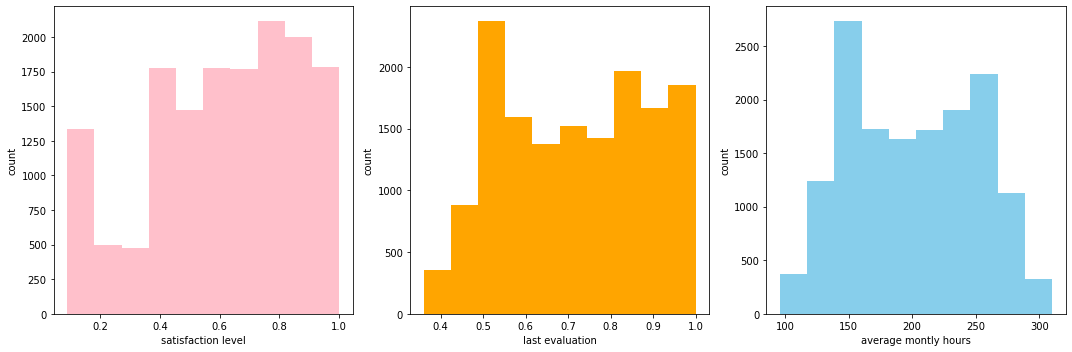

In [104]:
#Distribution of continuous variables 
fig = plt.figure(figsize = (15, 5))
plot1=plt.subplot2grid((1,3),(0,0))
plot2=plt.subplot2grid((1,3),(0,1))
plot3=plt.subplot2grid((1,3),(0,2))


plot1.hist(hr_df.satisfaction_level,color='pink')
plot1.set(xlabel='satisfaction level', ylabel='count')

plot2.hist(hr_df.last_evaluation,color='orange')
plot2.set(xlabel='last evaluation', ylabel='count')

plot3.hist(hr_df.average_montly_hours,color='skyblue')
plot3.set(xlabel='average montly hours', ylabel='count')

plt.tight_layout()
plt.show()




In [63]:

#Correlation Analysis of Categorical variables wrt to target 
cross_dept=pd.crosstab(hr_df['Department'],hr_df['left'],margins=False,normalize='index')
print(cross_dept)

cross_sal=pd.crosstab(hr_df['salary'],hr_df['left'],margins=False,normalize='index')
print(cross_sal)


left                0         1
Department                     
IT           0.777506  0.222494
RandD        0.846252  0.153748
accounting   0.734029  0.265971
hr           0.709066  0.290934
management   0.855556  0.144444
marketing    0.763403  0.236597
product_mng  0.780488  0.219512
sales        0.755072  0.244928
support      0.751009  0.248991
technical    0.743750  0.256250
left           0         1
salary                    
high    0.933711  0.066289
low     0.703116  0.296884
medium  0.795687  0.204313
Contingency Coeff Department (chi2,pval): 
 0.17558486301599494 0.9159509795565386


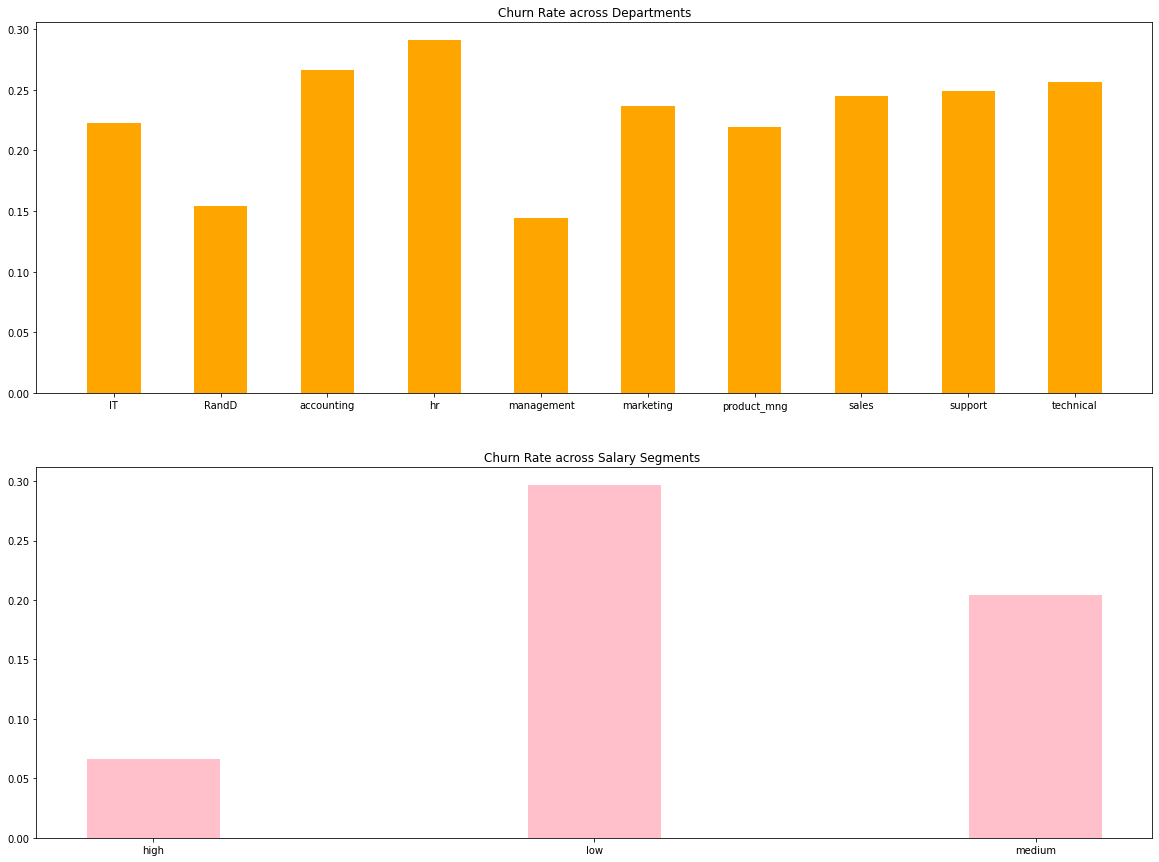

In [66]:

#Bar Charts
fig,ax = plt.subplots(nrows=2, ncols=1,figsize=(20,15))
 
# creating the bar plot
ax[0].bar(x=cross_dept.index,height=cross_dept[1],color='orange',width=0.5)
ax[0].set_title('Churn Rate across Departments')
ax[1].bar(x=cross_sal.index,height=cross_sal[1], color='pink',width=0.3)
ax[1].set_title('Churn Rate across Salary Segments ')
plt.show()

In [ ]:

cross1=pd.crosstab(hr_df['salary'],hr_df['left'],margins=False)
print(cross1)  
stat.chi2_contingency(cross1)

cross1=pd.crosstab(hr_df['Work_accident'],hr_df['left'],margins=False)
print(cross1)  
stat.chi2_contingency(cross1)

cross1=pd.crosstab(hr_df['promotion_last_5years'],hr_df['left'],margins=False)
print(cross1)  
stat.chi2_contingency(cross1)

cross1=pd.crosstab(hr_df['time_spend_company'],hr_df['left'],margins=False)
print(cross1)  
stat.chi2_contingency(cross1)

In [67]:

#Correlation Analysis of Continuous Variables to target categorical variable 
#Using Point Biserialr correlation coeff .
corr_pointBis=stat.pointbiserialr(hr_df['satisfaction_level'],hr_df['left'])
print("satisfaction_level",corr_pointBis)

corr_pointBis=stat.pointbiserialr(hr_df['last_evaluation'],hr_df['left'])
print("last_evaluation",corr_pointBis)



satisfaction_level PointbiserialrResult(correlation=-0.38837498342411403, pvalue=0.0)
last_evaluation PointbiserialrResult(correlation=0.006567120447534078, pvalue=0.4212701963736362)


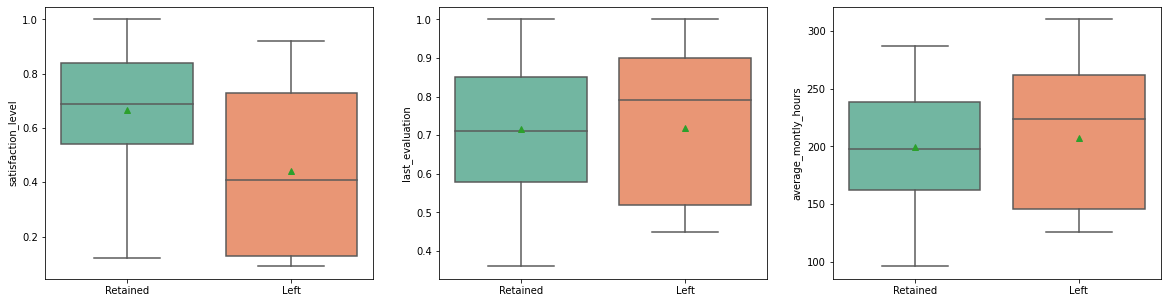

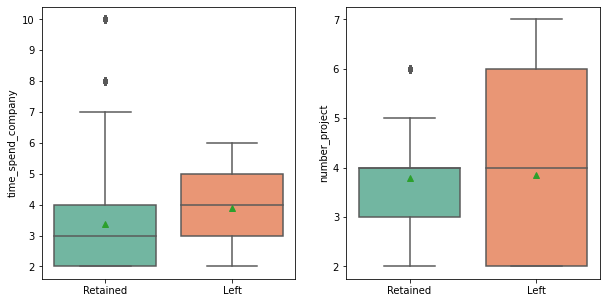

In [84]:
#Boxplots of Continuous Variables
fig,ax = plt.subplots(ncols=3,figsize=(20,5))
_box=sns.boxplot(data = hr_df,y='satisfaction_level',x='left',showmeans=True,ax=ax[0],palette='Set2')
_box=sns.boxplot(data = hr_df,y='last_evaluation',x='left',showmeans=True,ax=ax[1],palette='Set2')
_box=sns.boxplot(data = hr_df,y='average_montly_hours',x='left',showmeans=True,ax=ax[2],palette='Set2')
for n in range(0,3):
    ax[n].set_xticklabels(labels=['Retained','Left'])
    ax[n].set_xlabel(None)

fig,ax = plt.subplots(ncols=2,figsize=(10,5))
_box=sns.boxplot(data = hr_df,y='time_spend_company',x='left',showmeans=True,ax=ax[0],palette='Set2')
_box=sns.boxplot(data = hr_df,y='number_project',x='left',showmeans=True,ax=ax[1],palette='Set2')
for n in range(0,2):
    ax[n].set_xticklabels(labels=['Retained','Left'])
    ax[n].set_xlabel(None)


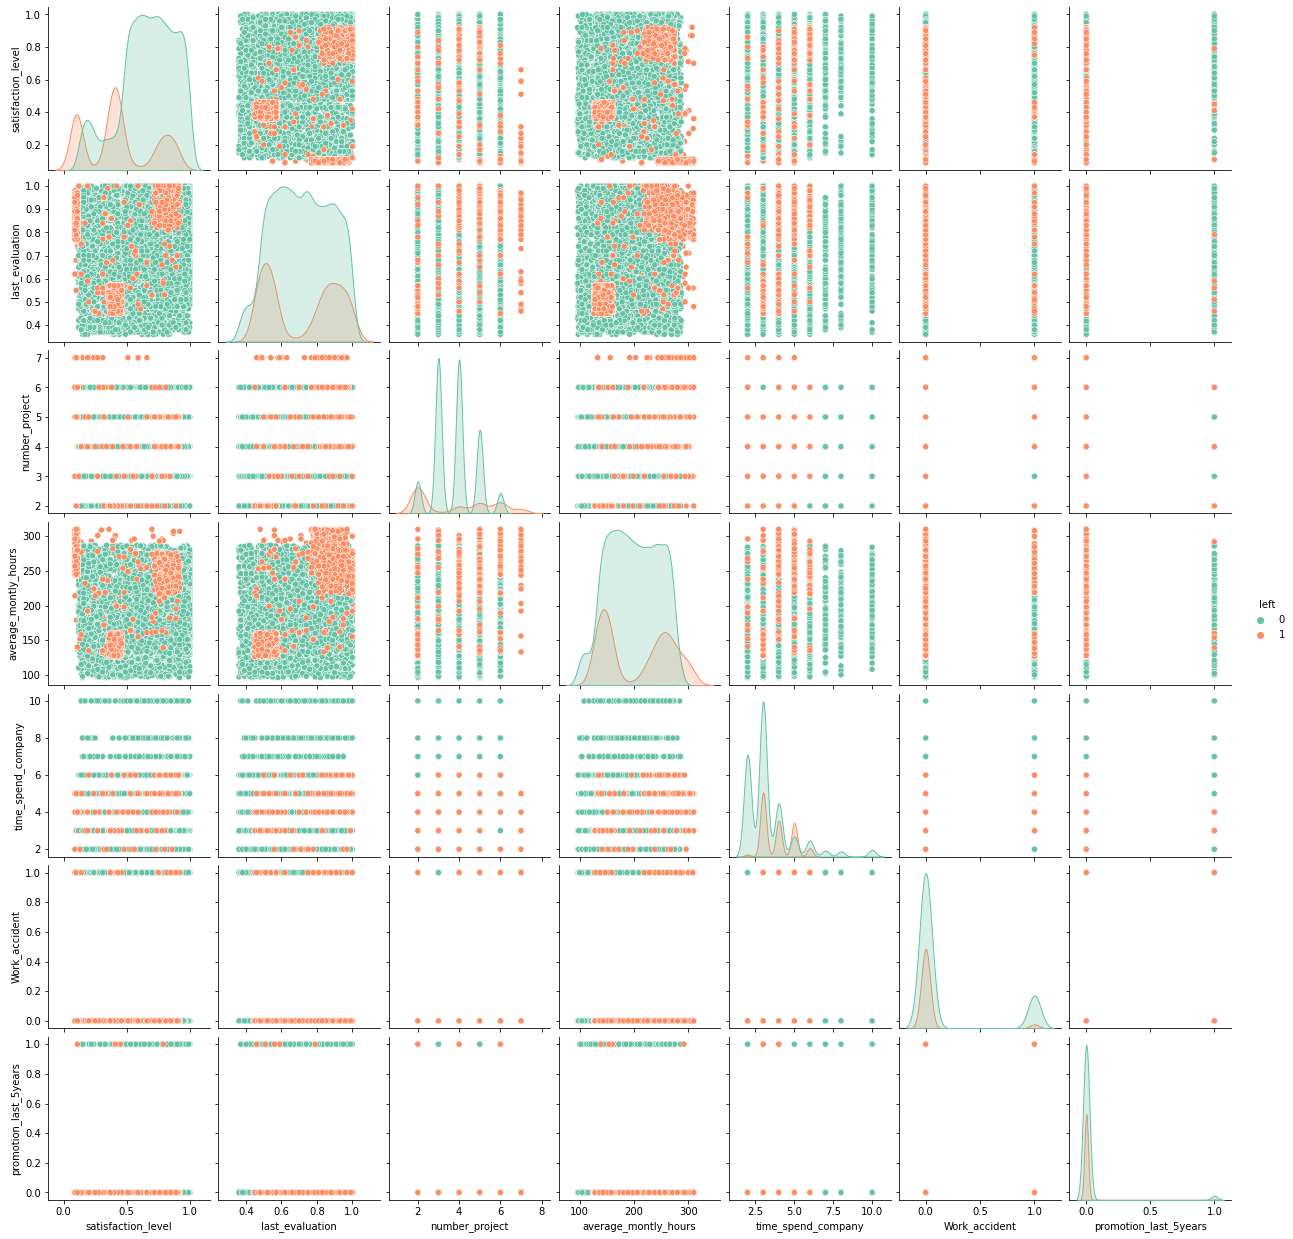

In [87]:
# Correlation between all features
sns.pairplot(hr_df, hue="left",palette="Set2")



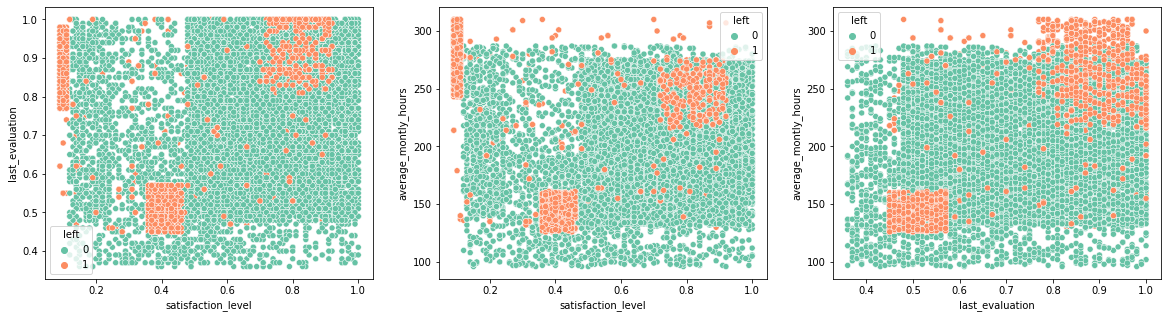

In [88]:
#3 scatter plots of numeric continuous features
fig,ax=plt.subplots(ncols=3,figsize=(20,5))
sns.scatterplot(data=hr_df,x='satisfaction_level',y='last_evaluation',hue='left', ax=ax[0],palette="Set2")
sns.scatterplot(data=hr_df,x='satisfaction_level',y='average_montly_hours',hue='left', ax=ax[1],palette="Set2")
sns.scatterplot(data=hr_df,x='last_evaluation',y='average_montly_hours',hue='left', ax=ax[2],palette="Set2")

In [234]:
df_x=hr_df.loc[(hr_df["left"] == 1) & (hr_df["last_evaluation"] > 0.7) & (hr_df["satisfaction_level"]>0.6)]
print('Resigned Cluster Average - Overall Average')
print(df_x.mean()-hr_df.mean())
print('-----------------------------')
print('Resigned Cluster Salary Range')
print(df_x['salary'].value_counts())

Resigned Cluster Average - Overall Average
satisfaction_level        0.202746
last_evaluation           0.204754
number_project            0.747326
average_montly_hours     42.573715
time_spend_company        1.605775
Work_accident            -0.094772
left                      0.761917
promotion_last_5years    -0.020185
dtype: float64
-----------------------------
Resigned Cluster Salary Range
low       562
medium    349
high       12
Name: salary, dtype: int64


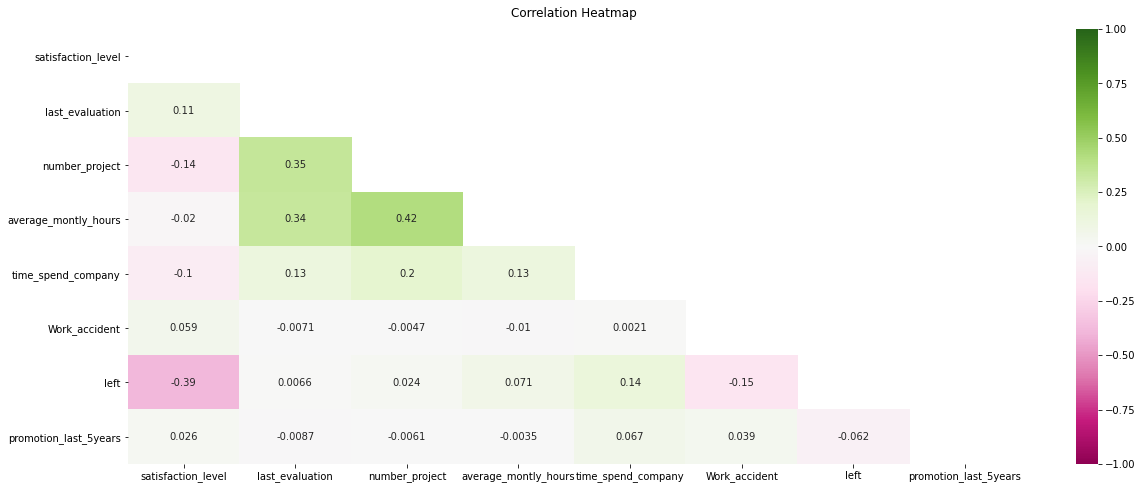

In [95]:
#Correlation Coefficient Matrix 

fig=plt.figure(figsize=(20,8))
resign_corr=hr_df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(hr_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


In [248]:
#Split Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

featureset=hr_df.loc[:,hr_df.columns!='left']
featureset=featureset.drop(columns=['last_evaluation','Work_accident'])
one_hot_feature=pd.get_dummies(featureset, columns = ['Department','salary','number_project','promotion_last_5years'],drop_first=True)
print(featureset)
print(one_hot_feature)
X_train,X_test,Y_train,Y_test=train_test_split(one_hot_feature,hr_df['left'],train_size=0.9)
print(Y_train)


       satisfaction_level  number_project  average_montly_hours  \
0                    0.38               2                   157   
1                    0.80               5                   262   
2                    0.11               7                   272   
3                    0.72               5                   223   
4                    0.37               2                   159   
...                   ...             ...                   ...   
14994                0.40               2                   151   
14995                0.37               2                   160   
14996                0.37               2                   143   
14997                0.11               6                   280   
14998                0.37               2                   158   

       time_spend_company  promotion_last_5years Department  salary  
0                       3                      0      sales     low  
1                       6                      0      s

In [249]:
#Modeling Using Logistic Regression
model=LogisticRegression(solver='newton-cg',max_iter=100) # create an object of Logistic Regression
#Training the model
model.fit(X_train,Y_train)
#Predict
predictions=model.predict(X_test)
#output=pd.concat([X_test,Y_test],axis=1)
print(predictions)

print("model score: {:.3f}".format(model.score(X_test, Y_test)))

[1 0 0 ... 1 0 0]
model score: 0.856


ROC AUC SCORE:  0.9105491817599441 



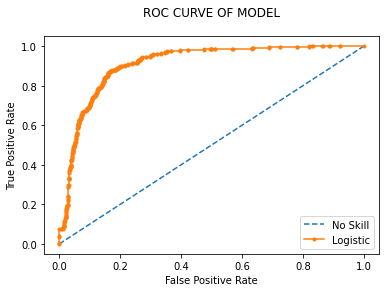

In [250]:
#ROC CURVE and AUC SCORE
from sklearn.metrics import roc_auc_score,roc_curve

y_pred=model.predict(X_test)
y_proba=model.predict_proba(X_test)

ns_probs = [0 for _ in range(len(Y_test))]
ns_auc = roc_auc_score(Y_test, ns_probs)

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, y_proba[:,1])
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC CURVE OF MODEL",pad="20")
plt.legend()
print("ROC AUC SCORE: ",roc_auc_score(Y_test, y_proba[:, 1]),"\n")


In [256]:
df_x.head()
df_x.describe(include='all')
#Checking salary category of the cluster
df_x_Grt09=df_x.loc[df_x['last_evaluation']>=0.9,'salary']
df_xLess09=df_x.loc[df_x['last_evaluation']< 0.9, 'salary']

print("Salary Category of Cluster last_evaluation> =0.9 \n",df_x_Grt09.describe(include='all'))
print("\n Salary Category of Cluster last_evaluation< 0.9 \n",df_xLess09.describe(include='all'))

#Setting those in this  cluster  with satisfaction_level >= 0.9  in salary=high
df_x.loc[df_x['last_evaluation']>=0.9,'salary']='high'
#Setting those in this  cluster  with satisfaction_level < 0.9  in salary=medium
df_x.loc[df_x['last_evaluation']<0.9,'salary']='medium'

print(df_x['salary'].describe())
print(sum(df_x['left']))

Salary Category of Cluster last_evaluation> =0.9 
 count        585
unique         1
top       medium
freq         585
Name: salary, dtype: object

 Salary Category of Cluster last_evaluation< 0.9 
 count        338
unique         1
top       medium
freq         338
Name: salary, dtype: object
count      923
unique       2
top       high
freq       585
Name: salary, dtype: object
923


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [257]:
cluster_feature=df_x.loc[:,hr_df.columns!='left']
cluster_feature=cluster_feature.drop(columns=['last_evaluation','Work_accident'])
one_hot_clustfeature=pd.get_dummies(cluster_feature, columns = ['Department','salary','number_project','promotion_last_5years'],drop_first=True)

one_hot_clustfeature['salary_low']=[0]*len(one_hot_clustfeature.index)

one_hot_clustfeature['number_project_7']=[0]*len(one_hot_clustfeature.index)
print(one_hot_clustfeature.info())
cluster_pred=model.predict(one_hot_clustfeature)
cluster_prob=model.predict_proba(one_hot_clustfeature)
print(sum(cluster_pred))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923 entries, 1 to 14993
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       923 non-null    float64
 1   average_montly_hours     923 non-null    int64  
 2   time_spend_company       923 non-null    int64  
 3   Department_RandD         923 non-null    uint8  
 4   Department_accounting    923 non-null    uint8  
 5   Department_hr            923 non-null    uint8  
 6   Department_management    923 non-null    uint8  
 7   Department_marketing     923 non-null    uint8  
 8   Department_product_mng   923 non-null    uint8  
 9   Department_sales         923 non-null    uint8  
 10  Department_support       923 non-null    uint8  
 11  Department_technical     923 non-null    uint8  
 12  salary_medium            923 non-null    uint8  
 13  number_project_3         923 non-null    uint8  
 14  number_project_4        

In [258]:
df_x['salary']='medium'

print(df_x['salary'].describe())



count        923
unique         1
top       medium
freq         923
Name: salary, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [259]:
cluster_feature=df_x.loc[:,hr_df.columns!='left']
cluster_feature=cluster_feature.drop(columns=['last_evaluation','Work_accident'])
one_hot_clustfeature=pd.get_dummies(cluster_feature, columns = ['Department','salary','number_project','promotion_last_5years'],drop_first=False)

one_hot_clustfeature['salary_low']=[0]*len(one_hot_clustfeature.index)
one_hot_clustfeature['number_project_7']=[0]*len(one_hot_clustfeature.index)
one_hot_clustfeature=one_hot_clustfeature.drop(columns=['Department_IT','number_project_2','promotion_last_5years_0'])
print(one_hot_clustfeature.info())
cluster_pred=model.predict(one_hot_clustfeature)
cluster_prob=model.predict_proba(one_hot_clustfeature)
print(sum(cluster_pred))

i=0
for i in range(len(one_hot_clustfeature.columns)):
  print(one_hot_feature.columns[i] ,"\t \t:" ,model.coef_[0,i])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 923 entries, 1 to 14993
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       923 non-null    float64
 1   average_montly_hours     923 non-null    int64  
 2   time_spend_company       923 non-null    int64  
 3   Department_RandD         923 non-null    uint8  
 4   Department_accounting    923 non-null    uint8  
 5   Department_hr            923 non-null    uint8  
 6   Department_management    923 non-null    uint8  
 7   Department_marketing     923 non-null    uint8  
 8   Department_product_mng   923 non-null    uint8  
 9   Department_sales         923 non-null    uint8  
 10  Department_support       923 non-null    uint8  
 11  Department_technical     923 non-null    uint8  
 12  salary_medium            923 non-null    uint8  
 13  number_project_3         923 non-null    uint8  
 14  number_project_4        

In [261]:
df_x['salary']='high'

print(df_x['salary'].describe())

cluster_feature=df_x.loc[:,hr_df.columns!='left']
cluster_feature=cluster_feature.drop(columns=['last_evaluation','Work_accident'])
one_hot_clustfeature=pd.get_dummies(cluster_feature, columns = ['Department','salary','number_project','promotion_last_5years'],drop_first=True)

one_hot_clustfeature['salary_low']=[0]*len(one_hot_clustfeature.index)
one_hot_clustfeature['salary_medium']=[0]*len(one_hot_clustfeature.index)
one_hot_clustfeature['number_project_7']=[0]*len(one_hot_clustfeature.index)
#one_hot_clustfeature=one_hot_clustfeature.drop(columns=['Department_IT','number_project_2','promotion_last_5years_0'])
print(one_hot_clustfeature.info())
cluster_pred=model.predict(one_hot_clustfeature)
cluster_prob=model.predict_proba(one_hot_clustfeature)
print(sum(cluster_pred))

count      923
unique       1
top       high
freq       923
Name: salary, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 923 entries, 1 to 14993
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       923 non-null    float64
 1   average_montly_hours     923 non-null    int64  
 2   time_spend_company       923 non-null    int64  
 3   Department_RandD         923 non-null    uint8  
 4   Department_accounting    923 non-null    uint8  
 5   Department_hr            923 non-null    uint8  
 6   Department_management    923 non-null    uint8  
 7   Department_marketing     923 non-null    uint8  
 8   Department_product_mng   923 non-null    uint8  
 9   Department_sales         923 non-null    uint8  
 10  Department_support       923 non-null    uint8  
 11  Department_technical     923 non-null    uint8  
 12  number_project_3         923 non-null    uin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
